One of the most important parts of scientific research is displaying your results in a concise, clean, and understandable way. Luckily, matplotlib exists. matplotlib is a Python library for plotting that is incredibily diverse and customizable. The first thing we'll need to do is read in the library itself, along with NumPy so we can generate some data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Baby's First Plot

The first thing we'll need is data to plot. Let's just generate an array from 0 to 2$\pi$ and take the sin of it.

In [2]:
x = np.linspace(0, 2*np.pi, 40) # array from 0 to 2pi with 50 points
y = np.sin(x)                   # sin(x)

To plot, we can use plt.plot (for a line) or plt.scatter (for a scatter plot). Let's try both.

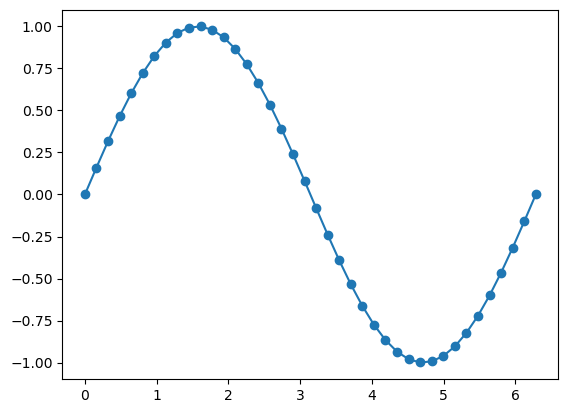

In [3]:
plt.plot(x, y)      # line plot
plt.scatter(x, y)   # scatter plot

For now, that's the really important stuff. The next cell is going to include a **lot** of customization, including some reccomendations. 

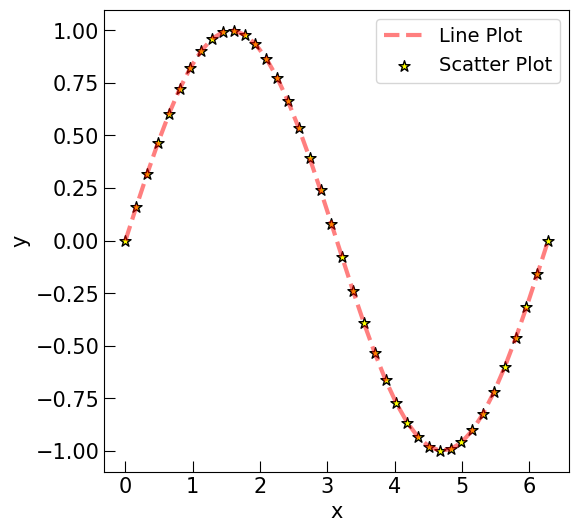

In [4]:
plt.figure(figsize=(6,6))          # generate a figure where you can specify the dimensions, in inches
                                   # PLOTS. SHOULD. ALWAYS. BE. SQUARE. Unless it's a spectrum.
plt.plot(x, y, 
         color='red',              # choose the color of your line. try to avoid mixing reds and greens
         lw=3,                     # choose the 'line width' (thickness) of your data
         linestyle='--',           # make the line dotted. options: (-, --, -., :)
         alpha=0.5,                # change the opacity of the line. alpha=0 is transparent, alpha=1 is opaque.
         label='Line Plot')        # set the label for the line. later we'll generate a legend.

plt.scatter(x, y, 
            marker='*',            # change what the point looks like. some options are (., o, *, v, ^, <, >)
            s=70,                  # change the size of the points
            edgecolor='black',     # change the edge color of the points
            color='yellow',        # change the center color of the points
            label='Scatter Plot')  # set the label for the scatter plot

plt.legend(loc='upper right',      # generate a legend and put it in the upper right hand corner
           fontsize=14)            # make the font bigger

plt.xlabel('x',                    # always label your axes!
           fontsize=15)            # make sure the labels are large enough to be legible
plt.ylabel('y',                    
           fontsize=15)            

# The next few things are nitpicky, but if a plot doesn't look "good" to me, they're usually the reason why. 

plt.xticks(fontsize=15)            # we want to be able to see the ticks on each axis
plt.yticks(fontsize=15)

ax = plt.gca()                     # Python is an object-oriented language. Without going into too much detail, this 
                                   #        command Gets the Current Axis (hence gca) of the plot so we can do even 
                                   #        more cool stuff with it.
        
ax.tick_params(axis="both",        # get the tick marks for each axis
               direction="in",     # point them inward instead of outward
               size=8)             # make them larger

plt.show()                         # go ahead and display the plot!

That's a lot to remember! Good thing you don't have to. After a couple of years most of this will be second nature, but I still had to look up a good portion of it to remember the exact phrasing.

# Exercises

## 1) Repetition

Use the cell below to plot x vs cos(x) (as a line plot) from 0 to 4$\pi$.

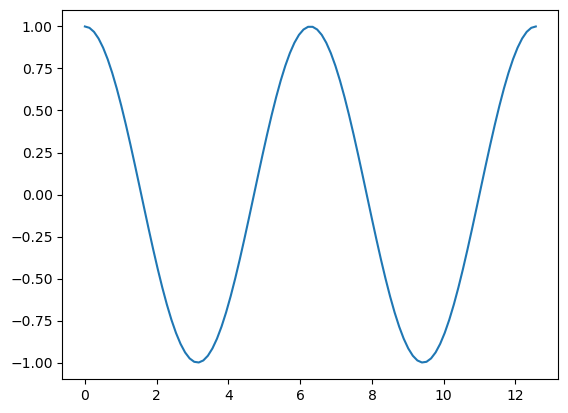

In [5]:
x = np.linspace(0, 4 * np.pi, 100)
plt.plot(x, np.cos(x))

## 2) Understanding

Use the cell below to create a square plot showing sin(x) from 0 to $\frac{\pi}{2}$. Then show the Taylor expansion for sin(x) (just the first two terms) over the same range to see how well they match. Make sure to make the lines different colors, and label them in a legend!

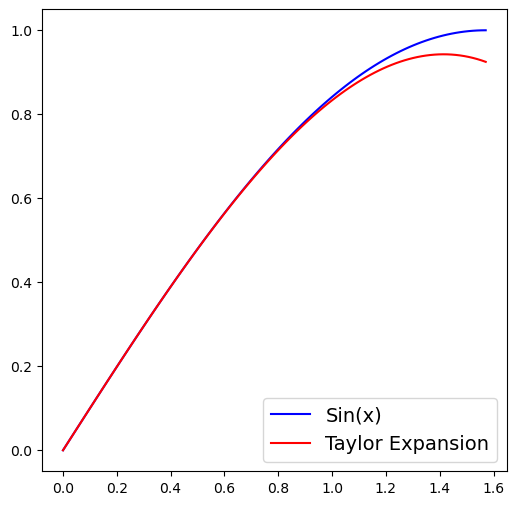

In [6]:
x = np.linspace(0, np.pi/2, 100)
y = np.sin(x)
y_approx = x - x ** 3 / 6

plt.figure(figsize=(6,6))
plt.plot(x, y, color='blue', label='Sin(x)')
plt.plot(x, y_approx, color='red', label='Taylor Expansion')
plt.legend(loc='lower right', fontsize=14)

# 3) Challenge

For this problem we'll plot Gaussians of different widths. 

The first thing we'll need to do is write a function that takes as inputs your x array, a mean, and a standard deviation and returns a Gaussian. 

Next, we'll need a mean. Let's use $\mu=5$ for all our Gaussians, so we can easily compare widths. 

Then (in different colors! bonus points if it's in a sensical color sequence), plot 4 Gaussians with widths of [1, 2, 3, 5]. 

Then label each one with its width in a legend.

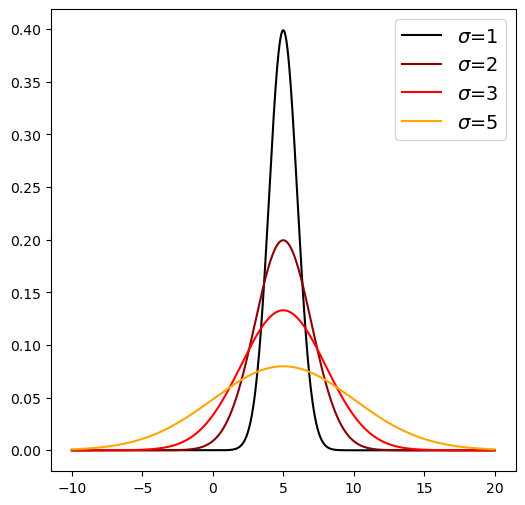

In [7]:
def gaussian(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

plt.figure(figsize=(6,6))
x = np.linspace(-10, 20, 1000)
sigmas = [1, 2, 3, 5]
colors = ['black', 'darkred', 'red', 'orange']
for ii in range(len(sigmas)):
    plt.plot(x, gaussian(x, mu=5, sigma=sigmas[ii]), 
             color=colors[ii], label=f'$\sigma$={sigmas[ii]}')
plt.legend(fontsize=14)

Question: is your code easily adaptable to plotting a large number of Gaussians? If you used a new line to plot each Gaussian, it may not be. If you used a for loop, your code is better able to be adjusted for more data. 

# Astronomy Exercise

Now we can start thinking about astrophysical data. Astronomers frequently work with *spectra*, which shows flux as a function of wavelength from an object. The commands below read in a spectrum, and define a wavelength and flux array. 

In [8]:
gal1 = np.load('Data/gal1.npy')
gal2 = np.load('Data/gal2.npy')

gal1_wavelength = gal1[0]
gal1_flux = gal1[1]

gal2_wavelength = gal2[0]
gal2_flux = gal2[1]

The spectra above show the H$\beta$ and [OIII] emission lines for two different galaxies. Astronomers can determine whether a galaxy's emission lines are dominated by star formation or by a central black hole (active galactic nuclei, AGN) by looking at the width of the lines. Emission lines from AGN are typically widened (a process called Doppler broadening) as compared to a star-forming galaxy's emission lines. 

Next, for each galaxy, plot flux against wavelength. You'll see that one galaxy's emission lines are wider than the other's. Label this galaxy 'AGN', and the other 'SF' (for star forming). How pretty can you make your spectrum? 

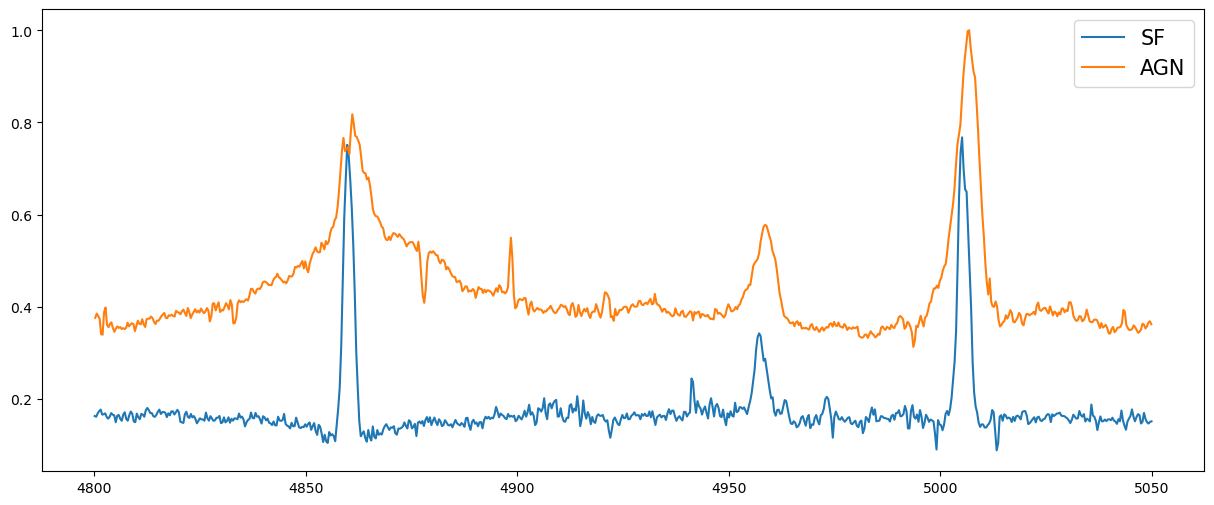

In [9]:
plt.figure(figsize=(15, 6))
plt.plot(gal1_wavelength, gal1_flux, label='SF')
plt.plot(gal2_wavelength, gal2_flux, label='AGN')
plt.legend(fontsize=15)

# Bonus: Latex

Astronomers use a lot of symbols that aren't on the normal keyboard, and in the era of typing it would be nice to be able to write them quickly. We cope with this by using Latex, (pronounced Latek or Lahtek), that uses commands to write different mathematical symbols. The syntax is '$\[symbol]$', for example: [dollar sign] \alpha [dollar sign], like this: $\alpha$. Hint: double click on this text to see the inner workings of how I've typed this paragraph.

You can also type different mathematical operators, like exponents and subscripts. Exponents are denoted by '^', and subscripts by '_', like this: $e = mc^2$, or $PV = nk_BT$. If you want to have more than one term in an exponent or subscript, use braces: $e^{-x}$. Finally, you can write fractions using \frac{numerator}{denominator}: $E_{kin} = \frac{3}{2}nk_BT$